## Observations and Insights 

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

all_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
#mouse_metadata.shape
#study_results.shape
#all_data.shape


# Display the data table for preview


all_data.tail(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1873,z795,Naftisol,Female,13,29,0,45.000000,0
1874,z795,Naftisol,Female,13,29,5,46.833475,0
1875,z795,Naftisol,Female,13,29,10,48.030804,0
1876,z795,Naftisol,Female,13,29,15,49.368132,1
1877,z795,Naftisol,Female,13,29,20,53.280657,1
1878,z795,Naftisol,Female,13,29,25,57.947100,2
1879,z795,Naftisol,Female,13,29,30,59.789636,2
1880,z795,Naftisol,Female,13,29,35,60.435654,2
1881,z795,Naftisol,Female,13,29,40,62.376639,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [4]:
# Checking the number of mice.
mice = all_data["Mouse ID"].unique()
noMice = len(mice)
print(f"The number of mice is {noMice}")




The number of mice is 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


duplicate_mouse_ids = all_data.loc[all_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids = duplicate_mouse_ids[0]




In [6]:
# Optional: Get all the data for the duplicate mouse ID. 



In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data = all_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
all_data.loc[all_data["Mouse ID"] == duplicate_mouse_ids]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [8]:
# Checking the number of mice in the clean DataFrame.
noMice = len(all_data["Mouse ID"].unique())
noMice

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


drugmean = all_data.groupby(["Drug Regimen"]).mean()
#drugmean["Tumor Volume (mm3)"]
drugmedian = all_data.groupby(["Drug Regimen"]).median()
drugmedian["Tumor Volume (mm3)"]
drugvariance = all_data.groupby(["Drug Regimen"]).var()
drugstddev = all_data.groupby(["Drug Regimen"]).std()
drugsem = all_data.groupby(["Drug Regimen"]).sem()
drugSummaryStats = {"Drug Regimen Mean": drugmean["Tumor Volume (mm3)"], 
                    "Drug Regimen Median" : drugmedian["Tumor Volume (mm3)"],
                   "Drug Regimen Variance" : drugvariance["Tumor Volume (mm3)"], 
                    "Drug Standard Deviation" : drugstddev["Tumor Volume (mm3)"],
                   "Drug Regimen Standard Error" : drugsem["Tumor Volume (mm3)"]}
drugSummaryStats = pd.DataFrame(data = drugSummaryStats)
drugSummaryStats



,Drug Regimen Mean,Drug Regimen Median,Drug Regimen Variance,Drug Standard Deviation,Drug Regimen Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


#See above

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

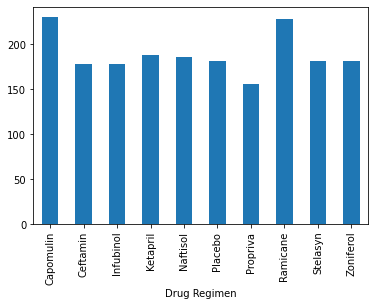

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
UniqueMiceByDrug = all_data.groupby(["Drug Regimen"]).count()
UniqueMiceByDrug = UniqueMiceByDrug['Mouse ID']
UniqueMiceByDrug.plot.bar()


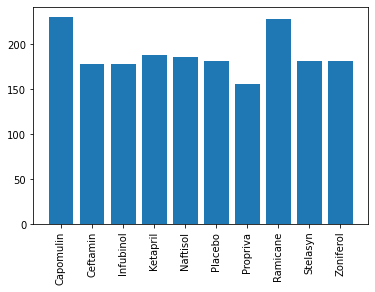

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

UniqueMiceByDrug = all_data.groupby(["Drug Regimen"]).count()
UniqueMiceByDrug = UniqueMiceByDrug['Mouse ID']

drugregimen = UniqueMiceByDrug.keys().to_list()
UniqueMiceByDrug = UniqueMiceByDrug.to_list()
plt.bar(drugregimen, UniqueMiceByDrug)
plt.xticks(rotation=90)
plt.show()


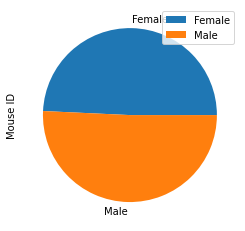

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
MouseSex = all_data.groupby('Sex').count()
#MouseSex.plot.pie(y='Sex')
MouseSex = MouseSex.plot.pie(y = 'Mouse ID')





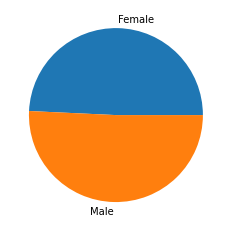

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

MouseSex = all_data.groupby('Sex').count()
MouseSexLegend = MouseSex.index
MouseSex = MouseSex["Mouse ID"]
plt.pie(MouseSex, labels=MouseSexLegend)
plt.show()



## Quartiles, Outliers and Boxplots

In [286]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



#By looking at the last timepoint for each mouse I want to get the final tumor volume.
#From here I want to group everything by Drug Regimen.  Then I will want to make a box
#plot for Capomulin, Ramicane, Infubinol, and Ceftamin and their respective final tumor volumes.  




data = all_data[['Mouse ID','Timepoint','Drug Regimen','Tumor Volume (mm3)']]

x = data.index.to_list()
#Make arrays of indexes
for index, row in data.iterrows():
    
    if row['Drug Regimen'] == 'Capomulin':
        x.remove(index)
    elif row['Drug Regimen'] == 'Ramicane':
        x.remove(index)
    elif row['Drug Regimen'] == 'Infubinol':
        x.remove(index)
    elif row['Drug Regimen'] == 'Ceftamin':
        x.remove(index)
    else:
        pass
    
data = data.drop(x)


 
records = []
#summary = data.groupby("Mouse ID")
#summary.count()

for index, row in data.iterrows(): 
    if index+1 != len(data):
        
        if row['Timepoint'] > data['Timepoint'][index + 1]:
            records.append(index)
        else:
            pass
    else:
        pass
data = data.drop(records)   
data.head(50)


KeyError: 474

In [16]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
